In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [22]:
df=pd.read_csv("StudentsPerformance.csv")

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [23]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [25]:
#Check for null values 
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [26]:
# Filling the NA values for Math Score
df['math score'].fillna(df['math score'].mean(), inplace=True)
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [28]:
# Filling NA the NA values for Reading Score
df['reading score'].fillna(df['reading score'].mean(),inplace=True)
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [29]:
# Filling NA the NA values for Reading Score
df['writing score'].fillna(df['writing score'].mean(),inplace=True)
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<AxesSubplot:>

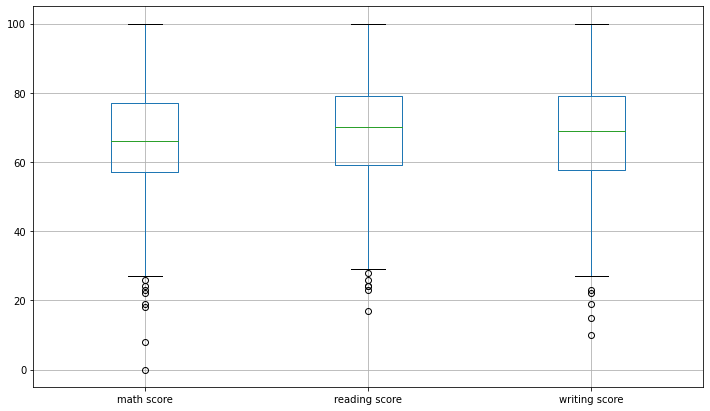

In [36]:
# Finding the Outliers by plotting a boxplot
col = ['math score', 'reading score' , 'writing score']
plt.figure(figsize=(12,7))
df.boxplot(col)

In [39]:
# Removing the Outliers for placement score
Q1 = df['writing score'].quantile(0.25)
Q3 = df['writing score'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# print(IQR)

21.25


In [44]:
# print(lower)
# print(upper)

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR



In [53]:
greater = np.where(df['writing score'] >= upper)
lesser = np.where(df['writing score'] <= lower)

<AxesSubplot:>

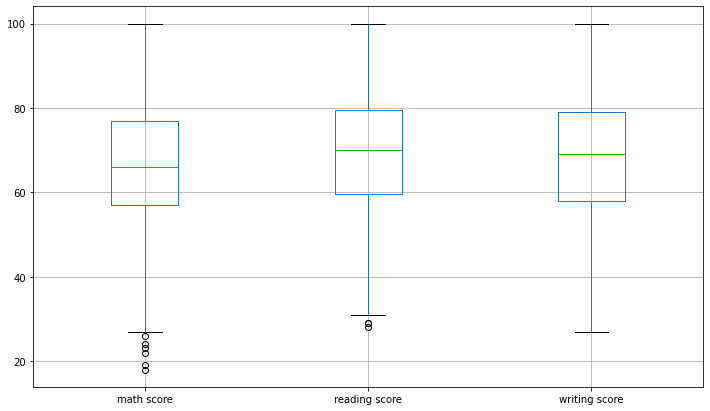

In [54]:
df.drop(greater[0], inplace=True)
df.drop(lesser[0], inplace=True)

plt.figure(1, figsize=(12,7))
col = ['math score', 'reading score', 'writing score' ]
df.boxplot(col)

In [57]:
# Data transformation of Gender
print(df['gender'].head())

df['gender'] = df['gender'].map({'Male':0, 'Female':1}).astype(float)
print(df['gender'].head())

0    female
1    female
2    female
3      male
4      male
Name: gender, dtype: object
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: gender, dtype: float64
